In [115]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
import os
import glob
from PIL import Image, ImageDraw, ImageFilter, ImageColor
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import math

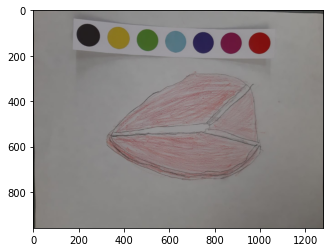

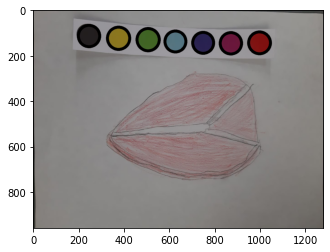

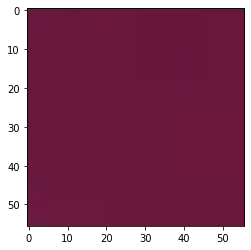

In [4]:
Pal1 = cv2.imread("Prueba2.jpeg")
Pal1 = cv2.cvtColor(Pal1, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(Pal1)
plt.show()

gray = cv2.cvtColor(Pal1, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(gray, 5)

cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,1,80,param1=100,param2=30,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))

crpi1 = []
for i in circles[0,:]:

  cv2.circle(Pal1, (i[0], i[1]), i[2], (0,0,0), 12)  

  r=i[2]
  x=int(i[0]-r+r/3+r/10)
  y=int(i[1]-r+r/3+r/10)
  
  crpi1.append(Pal1[y:int((y+((r-r/3-r/15)*2))), x:int((x+(2*(r-r/3-r/15))))]) 


plt.figure()
plt.imshow(Pal1)
plt.show()

plt.figure()
plt.imshow(crpi1[0])
plt.show()



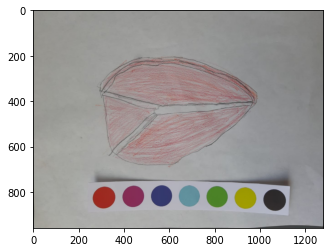

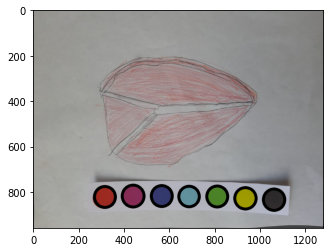

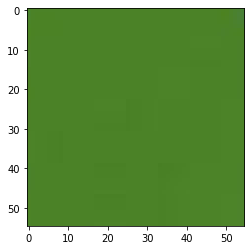

In [9]:
Pal2 = cv2.imread("Prueba1.jpeg")
#Pal2 = cv2.imread("WhatsApp Image 2020-10-21 at 3.05.03 PM.jpeg")
Pal2 = cv2.cvtColor(Pal2, cv2.COLOR_BGR2RGB) 
plt.figure()
plt.imshow(Pal2)
plt.show()

gray = cv2.cvtColor(Pal2, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(gray, 5)

cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,1,80,param1=100,param2=30,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))


crpi2 = []
for i in circles[0,:]:

  cv2.circle(Pal2, (i[0], i[1]), i[2], (0,0,0), 12)  

  r=i[2]
  x=int(i[0]-r+r/3+r/10)
  y=int(i[1]-r+r/3+r/10)
  
  crpi2.append(Pal2[y:int((y+((r-r/3-r/15)*2))), x:int((x+(2*(r-r/3-r/15))))]) 


plt.figure()
plt.imshow(Pal2)
plt.show()

plt.figure()
plt.imshow(crpi2[0])
plt.show()


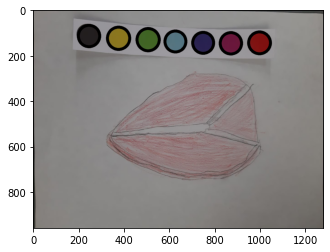

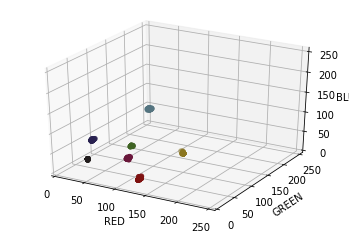

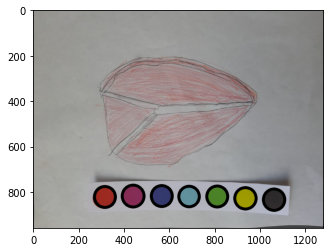

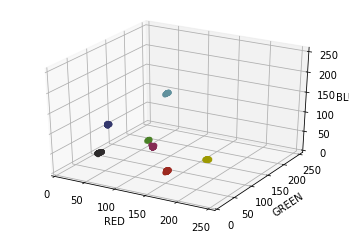

In [13]:
plt.figure()
plt.imshow(Pal1)
plt.show()


Total1=[]


for cr in crpi1:
  nrows,ncols,nch = cr.shape
  Ximg = np.reshape(cr,(nrows*ncols,3))
  idx = np.random.permutation(len(Ximg))[:600]
  Ximg = Ximg[idx,:]

  for i in Ximg:
    Total1.append(i)


Total1=np.array(Total1)
idx = np.random.permutation(len(Total1))[:600]
Total1 = Total1[idx,:]
# print(len(Total1))

R1 = Total1[:,0]
G1 = Total1[:,1]
B1 = Total1[:,2]


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(R1, G1, B1, c=Total1/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('RED')
ax.set_ylabel('GREEN')
ax.set_zlabel('BLUE')
plt.show()



Total2=[]

plt.figure()
plt.imshow(Pal2)
plt.show()

for cr in crpi2:
  nrows,ncols,nch = cr.shape
  Ximg = np.reshape(cr,(nrows*ncols,3))
  idx = np.random.permutation(len(Ximg))[:600]
  Ximg = Ximg[idx,:]

  for i in Ximg:
    Total2.append(i)


Total2=np.array(Total2)
idx = np.random.permutation(len(Total2))[:600]
Total2 = Total2[idx,:]
# print(len(Total2))

R2 = Total2[:,0]
G2 = Total2[:,1]
B2 = Total2[:,2]


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(R2, G2, B2, c=Total2/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('RED')
ax.set_ylabel('GREEN')
ax.set_zlabel('BLUE')
plt.show()

# print(Total[0])


[[85.04705882352941, 116.94117647058823, 129.08235294117648], [34.020833333333336, 29.979166666666668, 30.833333333333332], [126.9375, 17.364583333333332, 16.322916666666668], [139.2962962962963, 118.71604938271605, 31.0], [64.71428571428571, 99.91666666666667, 36.45238095238095], [41.04225352112676, 33.774647887323944, 80.25352112676056], [105.39080459770115, 23.436781609195403, 59.28735632183908]]
[110.35686274509806, 31.61111111111111, 53.541666666666664, 96.33744855967079, 67.02777777777777, 51.690140845070424, 62.70498084291187]


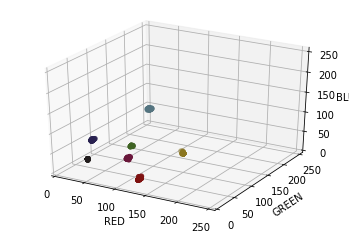

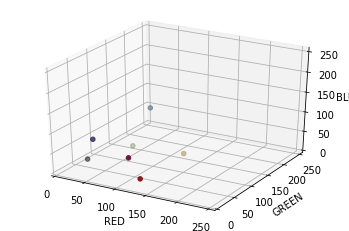

[[52.46913580246913, 56.851851851851855, 109.66666666666667], [157.26315789473685, 41.73684210526316, 32.56842105263158], [158.7391304347826, 155.27173913043478, 0.7717391304347826], [97.81012658227849, 145.43037974683546, 157.62025316455697], [75.02298850574712, 129.94252873563218, 38.97701149425287], [45.74074074074074, 42.75308641975309, 43.72839506172839], [133.42352941176472, 44.27058823529412, 85.3529411764706]]
[72.99588477366255, 77.18947368421053, 104.92753623188406, 133.62025316455697, 81.31417624521073, 44.074074074074076, 87.68235294117648]


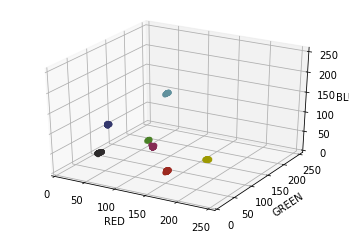

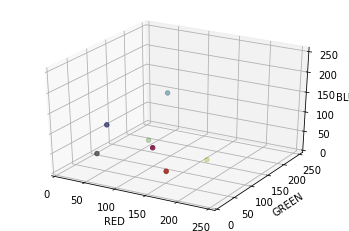

In [16]:
kmeans1 = KMeans(7).fit(Total1)
arrkmeans1 = [0 for i in range(7)]
auxkmeans1 = []
promkmeans1 = [[0,0,0] for i in range(7)]
promk1 = []
contkmeans1 = [0 for i in range(7)]

for i, l in enumerate(kmeans1.labels_):
  promkmeans1[l][0] += Total1[i][0]
  promkmeans1[l][1] += Total1[i][1]
  promkmeans1[l][2] += Total1[i][2]
  contkmeans1[l] += 1
  # print("({0},{1},{2}) en clase {3}".format(Total[i][0], Total[i][1], Total[i][2], l))
  if l not in auxkmeans1:
    auxkmeans1.append(l)
    arrkmeans1[l] = ([Total1[i][0],Total1[i][1],Total1[i][2]])
    #print("({0},{1},{2}) en clase {3}".format(Total[i][0], Total[i][1], Total[i][2], l))
arrkmeans1 = np.array(arrkmeans1)
for i in range(7):
  #print(promkmeans1[i][0])
  #promkmeans1[i] = (promkmeans1[i][0])/contkmeans1[i]
  promkmeans1[i][0] /= contkmeans1[i]
  promkmeans1[i][1] /= contkmeans1[i]
  promkmeans1[i][2] /= contkmeans1[i]
  promk1.append((promkmeans1[i][0]+promkmeans1[i][1]+promkmeans1[i][2])/3)
print(promkmeans1)
print(promk1)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(R1, G1, B1, c=Total1/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('RED')
ax.set_ylabel('GREEN')
ax.set_zlabel('BLUE')
plt.show()
# promkmeans = np.array(promkmeans)
# promkmeans = 
#print(promkmeans[0])
#print(arrkmeans)

H1 = arrkmeans1[:,0]
S1 = arrkmeans1[:,1]
V1 = arrkmeans1[:,2]
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(H1, S1, V1, c=arrkmeans1/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('RED')
ax.set_ylabel('GREEN')
ax.set_zlabel('BLUE')
plt.show()

#-------------------------------------------------------------------------------

kmeans2 = KMeans(7).fit(Total2)
arrkmeans2 = [0 for i in range(7)]
auxkmeans2 = []
promkmeans2 = [[0,0,0] for i in range(7)]
promk2 = []
contkmeans2 = [0 for i in range(7)]

for i, l in enumerate(kmeans2.labels_):
  promkmeans2[l][0] += Total2[i][0]
  promkmeans2[l][1] += Total2[i][1]
  promkmeans2[l][2] += Total2[i][2]

  contkmeans2[l] += 1
  # print("({0},{1},{2}) en clase {3}".format(Total[i][0], Total[i][1], Total[i][2], l))
  if l not in auxkmeans2:
    auxkmeans2.append(l)
    arrkmeans2[l] = ([Total2[i][0],Total2[i][1],Total2[i][2]])
    #print("({0},{1},{2}) en clase {3}".format(Total[i][0], Total[i][1], Total[i][2], l))
arrkmeans2 = np.array(arrkmeans2)
for i in range(7):
  #promkmeans2[i] = (promkmeans2[i][0])/contkmeans2[i]
  promkmeans2[i][0] /= contkmeans2[i]
  promkmeans2[i][1] /= contkmeans2[i]
  promkmeans2[i][2] /= contkmeans2[i]
  promk2.append((promkmeans2[i][0]+promkmeans2[i][1]+promkmeans2[i][2])/3)
print(promkmeans2)
print(promk2)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(R2, G2, B2, c=Total2/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('RED')
ax.set_ylabel('GREEN')
ax.set_zlabel('BLUE')
plt.show()
# promkmeans = np.array(promkmeans)
# promkmeans = 
# print(promkmeans[0])
# print(arrkmeans)

H2 = arrkmeans2[:,0]
S2 = arrkmeans2[:,1]
V2 = arrkmeans2[:,2]
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(H2, S2, V2, c=arrkmeans2/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('RED')
ax.set_ylabel('GREEN')
ax.set_zlabel('BLUE')
plt.show()

In [49]:
index = 3
auxindex = 0
min = 1000000
actmin = 0
print("(",promkmeans1[index][0],", ",promkmeans1[index][1],", ",promkmeans1[index][2],")\n")
for i in range(7):
  actmin = abs(promkmeans1[index][0]-promkmeans2[i][0])+abs(promkmeans1[index][1]-promkmeans2[i][1])+abs(promkmeans1[index][2]-promkmeans2[i][2])
  print(str(i)+": (",abs(promkmeans1[index][0]-promkmeans2[i][0]),", ",abs(promkmeans1[index][1]-promkmeans2[i][1]),", ",abs(promkmeans1[index][2]-promkmeans2[i][2]),")")
  print("(",promkmeans2[i][0],", ",promkmeans2[i][1],", ",promkmeans2[i][2],")")
  print(actmin,"\n")
  if actmin < min:
    auxindex = i
    min = actmin
print(str(auxindex)+": ",min)

( 139.2962962962963 ,  118.71604938271605 ,  31.0 )

0: ( 86.82716049382717 ,  61.864197530864196 ,  78.66666666666667 )
( 52.46913580246913 ,  56.851851851851855 ,  109.66666666666667 )
227.35802469135803 

1: ( 17.966861598440545 ,  76.9792072774529 ,  1.568421052631578 )
( 157.26315789473685 ,  41.73684210526316 ,  32.56842105263158 )
96.51448992852502 

2: ( 19.44283413848629 ,  36.55568974771873 ,  30.22826086956522 )
( 158.7391304347826 ,  155.27173913043478 ,  0.7717391304347826 )
86.22678475577024 

3: ( 41.48616971401782 ,  26.714330364119405 ,  126.62025316455697 )
( 97.81012658227849 ,  145.43037974683546 ,  157.62025316455697 )
194.8207532426942 

4: ( 64.27330779054918 ,  11.22647935291613 ,  7.977011494252871 )
( 75.02298850574712 ,  129.94252873563218 ,  38.97701149425287 )
83.47679863771819 

5: ( 93.55555555555557 ,  75.96296296296296 ,  12.728395061728392 )
( 45.74074074074074 ,  42.75308641975309 ,  43.72839506172839 )
182.24691358024694 

6: ( 5.872766884531586 ,  7

[[140 119  30]
 [158 155   0]]


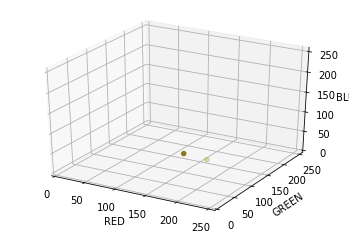

[[140 119  30]
 [ 75 130  39]]


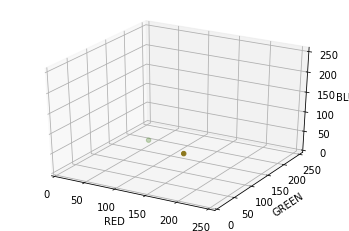

In [50]:
arrChido = np.array([arrkmeans1[3], arrkmeans2[2]])
print(arrChido)
R = arrChido[:,0]
G = arrChido[:,1]
B = arrChido[:,2]
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(R, G, B, c=arrChido/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('RED')
ax.set_ylabel('GREEN')
ax.set_zlabel('BLUE')
plt.show()

arrChido = np.array([arrkmeans1[3], arrkmeans2[4]])
print(arrChido)
R = arrChido[:,0]
G = arrChido[:,1]
B = arrChido[:,2]
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(R, G, B, c=arrChido/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('RED')
ax.set_ylabel('GREEN')
ax.set_zlabel('BLUE')
plt.show()

In [109]:
mtrx = [[] for _ in range(7)]
tabu = [0 for _ in range(7)]
res = [0 for _ in range(7)]
for index in range(7):
  auxindex = 0
  min = 1000000
  actmin = 0
  #print("(",promkmeans1[index][0],", ",promkmeans1[index][1],", ",promkmeans1[index][2],")\n")
  for i in range(7):
    actmin = abs(promkmeans1[index][0]-promkmeans2[i][0])+abs(promkmeans1[index][1]-promkmeans2[i][1])+abs(promkmeans1[index][2]-promkmeans2[i][2])
    mtrx[index].append(actmin)
    #print(str(i)+": (",abs(promkmeans1[index][0]-promkmeans2[i][0]),", ",abs(promkmeans1[index][1]-promkmeans2[i][1]),", ",abs(promkmeans1[index][2]-promkmeans2[i][2]),")")
    #print("(",promkmeans2[i][0],", ",promkmeans2[i][1],", ",promkmeans2[i][2],")")
    #print(actmin,"\n")
    if actmin < min:
      auxindex = i
      min = actmin
  #print(str(index)+") "+str(auxindex)+": ",min)
for j in range(7):
  '''
  for _ in mtrx:
    for __ in _:
      print(__, end=" | ")
    print()
  print()
  '''
  min = 1000000
  
  for i in range(7):

    actmin = np.argmin(mtrx[i])
    
    '''
    if not tabu[i]:
      print(str(i)+":",mtrx[i][actmin])
    '''

    if min > mtrx[i][actmin] and not tabu[i]:
      
      min = mtrx[i][actmin]
      col = actmin
      fil = i
  tabu[fil] = 1
  print("Min of "+str(fil)+":",min,col)
  res[fil] = col
  #print(tabu)
  for i in range(7):
    mtrx[i][col] = 1000000
  #print("\n_________________________________________________________________________________________________________________________________________________________________\n")
print(res)


Min of 1: 37.388888888888886 5
Min of 4: 42.859195402298845 4
Min of 5: 63.917231785776394 0
Min of 0: 69.79017125837679 3
Min of 2: 70.94342105263158 1
Min of 6: 74.93211629479381 6
Min of 3: 86.22678475577024 2
[3, 5, 1, 2, 4, 0, 6]


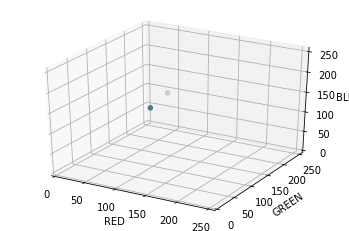

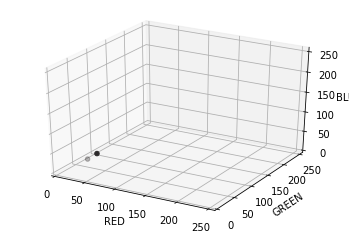

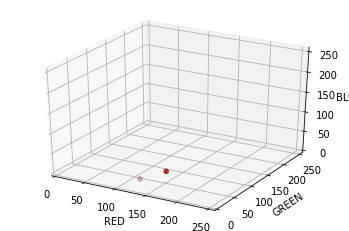

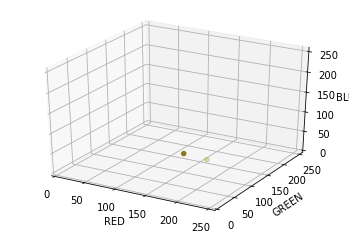

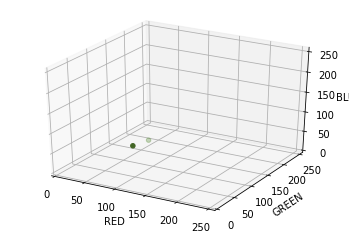

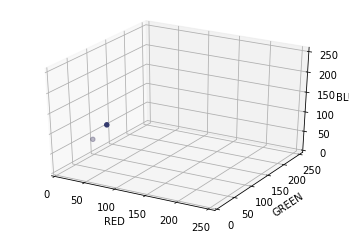

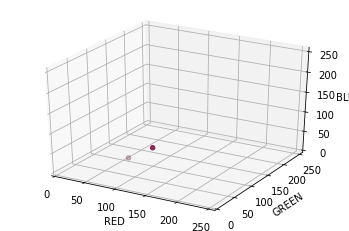

In [113]:
for i in range(7):
  arr = np.array([arrkmeans1[i], arrkmeans2[res[i]]])
  R = arr[:,0]
  G = arr[:,1]
  B = arr[:,2]
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  ax.scatter(R, G, B, c=arr/255)
  ax.set_xlim(0, 255)
  ax.set_ylim(0, 255)
  ax.set_zlim(0, 255)
  ax.set_xlabel('RED')
  ax.set_ylabel('GREEN')
  ax.set_zlabel('BLUE')
  plt.show()

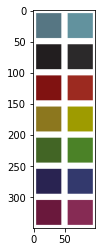

In [164]:
#[arrkmeans1[i], arrkmeans2[res[i]]]
im = Image.new('RGB', (100,50*7), (255,255,255)) # create the Image of size 1 pixel 
for _ in range(7):
  for i in range(40):
    for j in range(40):
      im.putpixel((5+i,5+j + (_*50)), (arrkmeans1[_][0],arrkmeans1[_][1],arrkmeans1[_][2]))
      im.putpixel((55+i,5+j + (_*50)), (arrkmeans2[res[_]][0],arrkmeans2[res[_]][1],arrkmeans2[res[_]][2]))
plt.figure()
plt.imshow(im)
plt.show()